# Import statements

In [0]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

# Select Device

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Load dataset and declare training parameters

In [3]:
training_parameters = {
    "n_epochs": 100,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
num_batches = len(data_loader)
print("Number of batches: ",num_batches)

Number of batches:  600


# Display an iamge

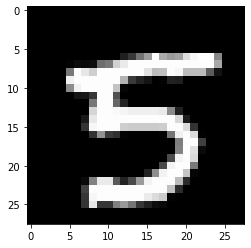

In [32]:
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

# Define Generator and Discriminator

In [7]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 10
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)
        
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784 + 10
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 10)

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

# Initilize Optimizers, loss function


In [0]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()


In [22]:
torch.ones(batch_size, dtype = torch.long)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

# Training Loop

[0/100]: loss_d: 0.425, loss_g: 1.772
[1/100]: loss_d: 0.463, loss_g: 1.595
[2/100]: loss_d: 0.468, loss_g: 1.571
[3/100]: loss_d: 0.474, loss_g: 1.556
[4/100]: loss_d: 0.490, loss_g: 1.465
[5/100]: loss_d: 0.493, loss_g: 1.461
[6/100]: loss_d: 0.497, loss_g: 1.453
[7/100]: loss_d: 0.504, loss_g: 1.430
[8/100]: loss_d: 0.493, loss_g: 1.467
Training Steps Completed:  499
2


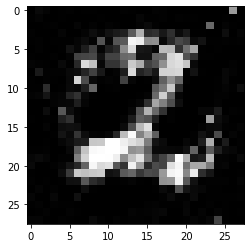

[9/100]: loss_d: 0.513, loss_g: 1.366
[10/100]: loss_d: 0.529, loss_g: 1.311
[11/100]: loss_d: 0.525, loss_g: 1.303
[12/100]: loss_d: 0.522, loss_g: 1.321
[13/100]: loss_d: 0.537, loss_g: 1.258
[14/100]: loss_d: 0.543, loss_g: 1.230
[15/100]: loss_d: 0.564, loss_g: 1.173
[16/100]: loss_d: 0.556, loss_g: 1.199
[17/100]: loss_d: 0.556, loss_g: 1.188
[18/100]: loss_d: 0.565, loss_g: 1.146
Training Steps Completed:  499
7


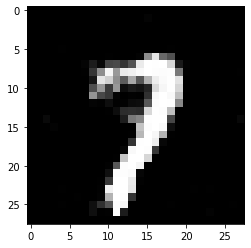

[19/100]: loss_d: 0.564, loss_g: 1.151
[20/100]: loss_d: 0.569, loss_g: 1.137
[21/100]: loss_d: 0.558, loss_g: 1.195
[22/100]: loss_d: 0.571, loss_g: 1.145
[23/100]: loss_d: 0.574, loss_g: 1.115
[24/100]: loss_d: 0.582, loss_g: 1.092
[25/100]: loss_d: 0.577, loss_g: 1.100
[26/100]: loss_d: 0.584, loss_g: 1.086
[27/100]: loss_d: 0.587, loss_g: 1.069
[28/100]: loss_d: 0.594, loss_g: 1.049
Training Steps Completed:  499
3


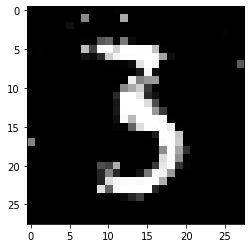

[29/100]: loss_d: 0.598, loss_g: 1.032
[30/100]: loss_d: 0.597, loss_g: 1.043
[31/100]: loss_d: 0.607, loss_g: 1.012
[32/100]: loss_d: 0.603, loss_g: 1.002
[33/100]: loss_d: 0.604, loss_g: 1.020
[34/100]: loss_d: 0.607, loss_g: 0.993
[35/100]: loss_d: 0.613, loss_g: 0.975
[36/100]: loss_d: 0.614, loss_g: 0.978
[37/100]: loss_d: 0.605, loss_g: 0.995
[38/100]: loss_d: 0.607, loss_g: 1.004
Training Steps Completed:  499
9


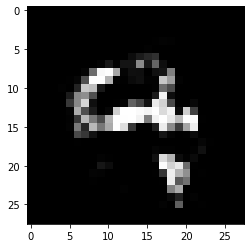

[39/100]: loss_d: 0.613, loss_g: 0.981
[40/100]: loss_d: 0.615, loss_g: 0.967
[41/100]: loss_d: 0.612, loss_g: 0.986
[42/100]: loss_d: 0.607, loss_g: 1.004
[43/100]: loss_d: 0.620, loss_g: 0.945
[44/100]: loss_d: 0.627, loss_g: 0.932
[45/100]: loss_d: 0.621, loss_g: 0.964
[46/100]: loss_d: 0.625, loss_g: 0.939
[47/100]: loss_d: 0.618, loss_g: 0.966
[48/100]: loss_d: 0.626, loss_g: 0.951
Training Steps Completed:  499
5


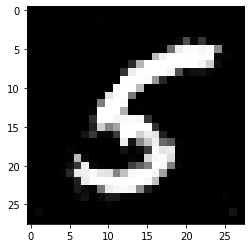

[49/100]: loss_d: 0.626, loss_g: 0.934
[50/100]: loss_d: 0.629, loss_g: 0.928
[51/100]: loss_d: 0.620, loss_g: 0.950
[52/100]: loss_d: 0.632, loss_g: 0.916
[53/100]: loss_d: 0.626, loss_g: 0.938
[54/100]: loss_d: 0.626, loss_g: 0.931
[55/100]: loss_d: 0.632, loss_g: 0.918
[56/100]: loss_d: 0.630, loss_g: 0.922
[57/100]: loss_d: 0.634, loss_g: 0.909
[58/100]: loss_d: 0.629, loss_g: 0.928
Training Steps Completed:  499
6


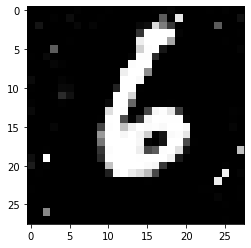

[59/100]: loss_d: 0.631, loss_g: 0.929
[60/100]: loss_d: 0.630, loss_g: 0.919
[61/100]: loss_d: 0.635, loss_g: 0.901
[62/100]: loss_d: 0.631, loss_g: 0.923
[63/100]: loss_d: 0.633, loss_g: 0.915
[64/100]: loss_d: 0.637, loss_g: 0.890
[65/100]: loss_d: 0.643, loss_g: 0.884
[66/100]: loss_d: 0.635, loss_g: 0.910
[67/100]: loss_d: 0.633, loss_g: 0.911
[68/100]: loss_d: 0.639, loss_g: 0.882
Training Steps Completed:  499
2


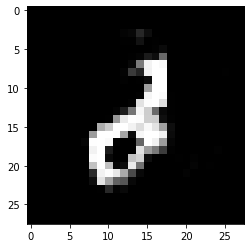

[69/100]: loss_d: 0.637, loss_g: 0.904
[70/100]: loss_d: 0.638, loss_g: 0.894
[71/100]: loss_d: 0.641, loss_g: 0.884
[72/100]: loss_d: 0.645, loss_g: 0.875
[73/100]: loss_d: 0.634, loss_g: 0.909
[74/100]: loss_d: 0.640, loss_g: 0.898
[75/100]: loss_d: 0.644, loss_g: 0.865
[76/100]: loss_d: 0.643, loss_g: 0.879
[77/100]: loss_d: 0.647, loss_g: 0.876
[78/100]: loss_d: 0.642, loss_g: 0.897
Training Steps Completed:  499
5


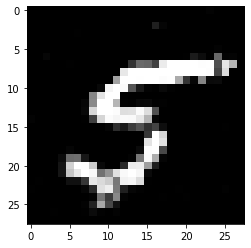

[79/100]: loss_d: 0.641, loss_g: 0.883
[80/100]: loss_d: 0.643, loss_g: 0.885
[81/100]: loss_d: 0.643, loss_g: 0.876
[82/100]: loss_d: 0.641, loss_g: 0.889
[83/100]: loss_d: 0.645, loss_g: 0.877
[84/100]: loss_d: 0.645, loss_g: 0.858
[85/100]: loss_d: 0.645, loss_g: 0.885
[86/100]: loss_d: 0.645, loss_g: 0.866
[87/100]: loss_d: 0.647, loss_g: 0.862
[88/100]: loss_d: 0.648, loss_g: 0.866
Training Steps Completed:  499
2


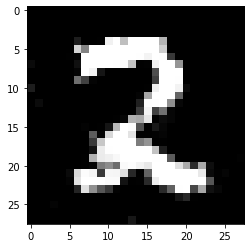

[89/100]: loss_d: 0.649, loss_g: 0.856
[90/100]: loss_d: 0.652, loss_g: 0.860
[91/100]: loss_d: 0.651, loss_g: 0.848
[92/100]: loss_d: 0.648, loss_g: 0.870
[93/100]: loss_d: 0.643, loss_g: 0.889
[94/100]: loss_d: 0.641, loss_g: 0.886
[95/100]: loss_d: 0.649, loss_g: 0.867
[96/100]: loss_d: 0.648, loss_g: 0.854
[97/100]: loss_d: 0.652, loss_g: 0.850
[98/100]: loss_d: 0.651, loss_g: 0.859
Training Steps Completed:  499
7


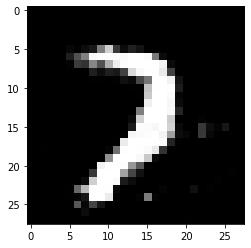

[99/100]: loss_d: 0.651, loss_g: 0.845


In [33]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):
        
        
        noise = torch.randn(batch_size,100).to(device)
        fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
        generated_data = generator(noise, fake_labels) # batch_size X 784

        
        # Discriminator
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1].to(device) # batch_size
        true_labels = torch.ones(batch_size).to(device)
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, digit_labels).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
        
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Generator

        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise, fake_labels) # batch_size X 784
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    print(fake_labels[0].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))
    